### Introduction
This notebook seeks to answer the following questions for the 10-Year Bond interest rate from Jan 1, 2009 to June 18, 2019.  
1.  Plot the time series, along with any logical or necessary differences to get a stationary dataset  
2.  Generate and interpret a PACF for the time series (and/or its differences)  
3.  Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data  
4.  Finally choose one specification and make the case for that as a logical model for your dataset.  

by Fred Etter

### Import modules

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Import the 10-Year Bond interest rates from Jan 1, 2009 to June 18, 2019 from "FRED".

In [2]:
df_10yr = pd.read_csv('DGS10.csv')

# Convert interest rate to a number, with coersion to throw NA's if conversion not possible
df_10yr['price'] = pd.to_numeric(df_10yr.DGS10, errors='coerce')

# Remove NA's
df_10yr.dropna(inplace=True)

In [3]:
df_10yr.head()

,DATE,DGS10,price
0,2010-01-04,3.85,3.85
1,2010-01-05,3.77,3.77
2,2010-01-06,3.85,3.85
3,2010-01-07,3.85,3.85
4,2010-01-08,3.83,3.83


### Plot the time series for the 10-Year Bond

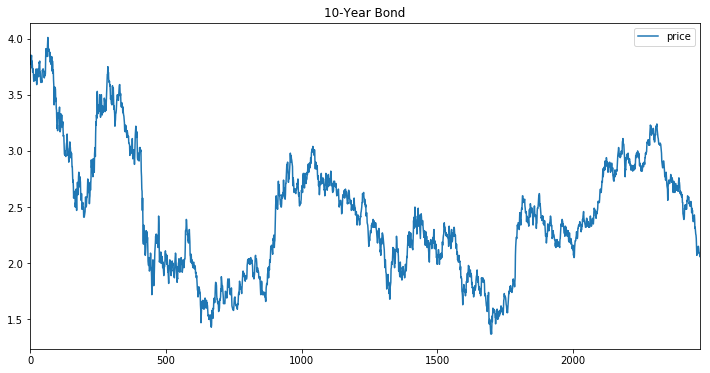

In [4]:
df_10yr.plot(figsize=(12, 6))
plt.title('10-Year Bond')
plt.show()

### Convert the x-axis to show the date.

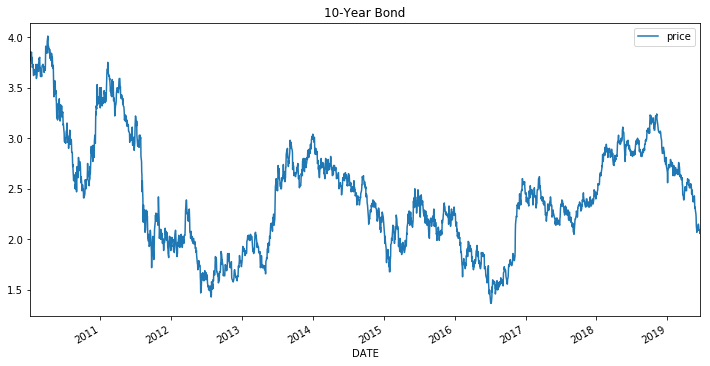

In [5]:
df_10yr.index = pd.to_datetime(df_10yr.DATE)
df_10yr.plot(figsize=(12, 6))
plt.title('10-Year Bond')
plt.show()

### Plot the difference in the time series from above.

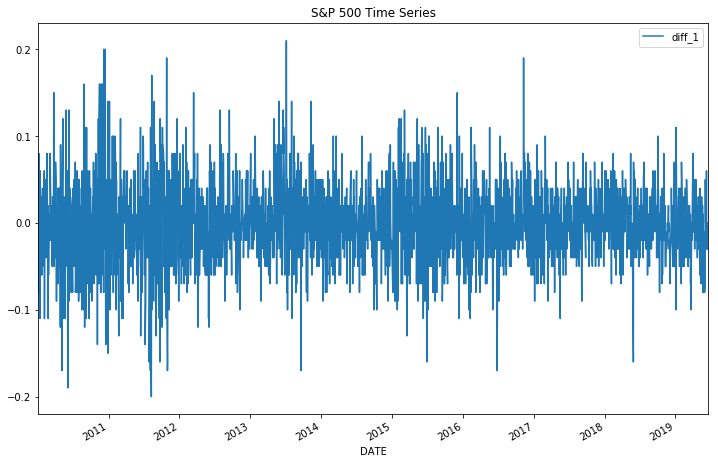

In [6]:
df_10yr['diff_1'] = df_10yr.price - df_10yr.price.shift()
df_10yr.plot(y='diff_1', figsize=(12, 8))
plt.title('S&P 500 Time Series')
plt.show()

The difference in day to day values ranges from about -0.2 to +0.2.  The volatility is fairly consistent over 10+ year horizon.

### Investigate and plot the PACF

Text(0.5, 1.0, '10-Year Bond PACF')

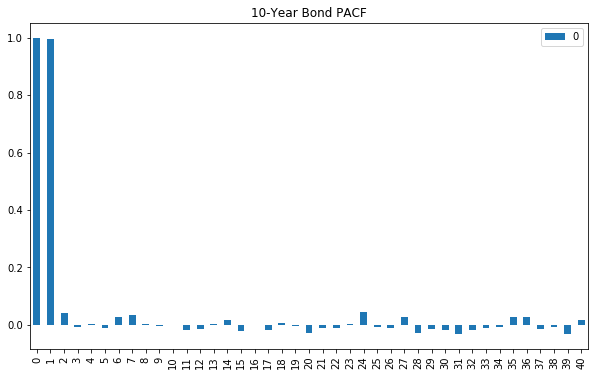

In [7]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df_10yr.price))
x_acf.plot(kind='bar', figsize=(10, 6))
plt.title("10-Year Bond PACF")

It looks like the initial time series has 1 autocorrelation - the first one.  

### Investigate and plot the differenced PACF

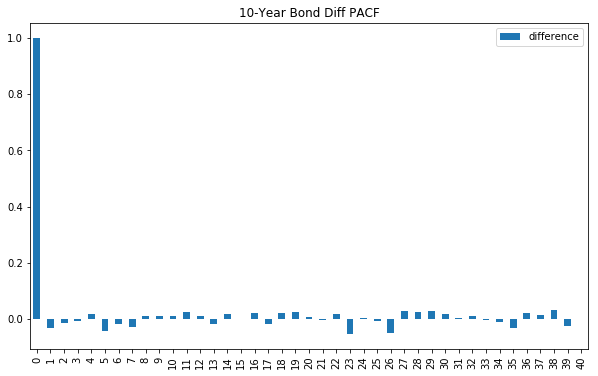

In [8]:
x_acf = pd.DataFrame(pacf(df_10yr.diff_1[1:]))
x_acf.plot(kind='bar', figsize=(10, 6))
plt.title("10-Year Bond Diff PACF")
plt.legend(['difference'])

The differenced PACF seems to show no real autocorrelation.

### Now, generate 5 ARIMA specifications and evaluate their efficacy at modeling the 10-Year Bond

In [9]:
# Number 1
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(df_10yr.price, order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2366
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3788.284
Method:                           css   S.D. of innovations              0.049
Date:                Sat, 22 Jun 2019   AIC                          -7572.568
Time:                        15:30:49   BIC                          -7561.030
Sample:                             1   HQIC                         -7568.368
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.754      0.451      -0.003       0.001
Residuals Description
count    2.366000e+03
mean     7.191216e-10
std      4.880797e-02
min     -1.992434e-01
25%     -2.924345e-02

C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Fred\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Fred\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarnin

**Evaluation for Number 1:**  The evaluation for these models are relative to the evaluations for the other models, so the evaluation is included at the end of this notebook.  Two significan variables to look at are the AIC (lower is better) and the log likelihood (closer to zero is better).


In [10]:
# Number 2
from statsmodels.tsa.arima_model import ARIMA
model_100 = ARIMA(df_10yr.price, order=(1,0,0))
model_100_fit = model_100.fit()
print(model_100_fit.summary())
print('Residuals Description')
print(model_100_fit.resid.describe())

C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2367
Model:                     ARMA(1, 0)   Log Likelihood                3788.474
Method:                       css-mle   S.D. of innovations              0.049
Date:                Sat, 22 Jun 2019   AIC                          -7570.949
Time:                        15:30:49   BIC                          -7553.641
Sample:                             0   HQIC                         -7564.648
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.5510      0.297      8.584      0.000       1.969       3.134
ar.L1.price     0.9970      0.002    595.621      0.000       0.994       1.000
                                    Roots       

**Evaluation for Number 2:** (see end of report)

In [11]:
# Number 3
from statsmodels.tsa.arima_model import ARIMA
model_001 = ARIMA(df_10yr.price, order=(0,0,1))
model_001_fit = model_001.fit()
print(model_001_fit.summary())
print('Residuals Description')
print(model_001_fit.resid.describe())

C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2367
Model:                     ARMA(0, 1)   Log Likelihood                -462.539
Method:                       css-mle   S.D. of innovations              0.294
Date:                Sat, 22 Jun 2019   AIC                            931.079
Time:                        15:30:49   BIC                            948.387
Sample:                             0   HQIC                           937.380
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4388      0.012    208.834      0.000       2.416       2.462
ma.L1.price     0.9325      0.005    170.045      0.000       0.922       0.943
                                    Roots       

**Evaluation for Number 3:**  (see end of report)

In [12]:
# Number 4
from statsmodels.tsa.arima_model import ARIMA
model_201 = ARIMA(df_10yr.price, order=(2,0,1))
model_201_fit = model_201.fit()
print(model_201_fit.summary())
print('Residuals Description')
print(model_201_fit.resid.describe())

C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2367
Model:                     ARMA(2, 1)   Log Likelihood                3790.234
Method:                       css-mle   S.D. of innovations              0.049
Date:                Sat, 22 Jun 2019   AIC                          -7570.467
Time:                        15:30:50   BIC                          -7541.621
Sample:                             0   HQIC                         -7559.966
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.5528      0.300      8.499      0.000       1.964       3.142
ar.L1.price     0.0715      0.053      1.360      0.174      -0.032       0.174
ar.L2.price     0.9228      0.052     17.627    

**Evaluation for Number 4:**  (see end of report)

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model_500 = ARIMA(df_10yr.price, order=(5,0,0))
model_500_fit = model_500.fit()
print(model_500_fit.summary())
print('Residuals Description')
print(model_500_fit.resid.describe())

C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2367
Model:                     ARMA(5, 0)   Log Likelihood                3790.108
Method:                       css-mle   S.D. of innovations              0.049
Date:                Sat, 22 Jun 2019   AIC                          -7566.216
Time:                        15:30:51   BIC                          -7525.830
Sample:                             0   HQIC                         -7551.513
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.5563      0.307      8.338      0.000       1.955       3.157
ar.L1.price     0.9670      0.021     47.046      0.000       0.927       1.007
ar.L2.price     0.0200      0.029      0.697    

**Evaluation for Number 5:**  (see end of report)  

### Residuals:  

For ARIMA model (0, 1, 0):

Text(0.5, 1.0, 'Histogram of Residuals')

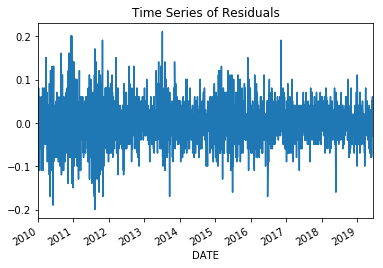

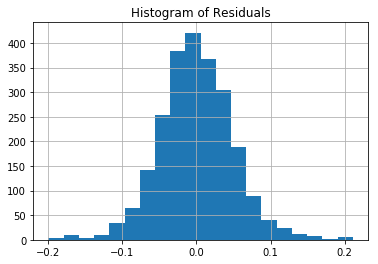

In [14]:
# For model ARIMA(0, 1, 0)
residuals = pd.DataFrame(model_010_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

For ARIMA model (1, 0, 0):

Text(0.5, 1.0, 'Histogram of Residuals')

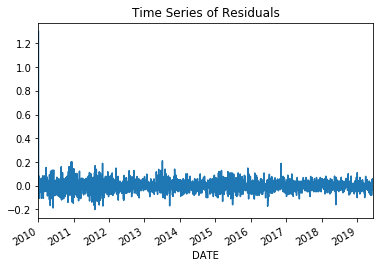

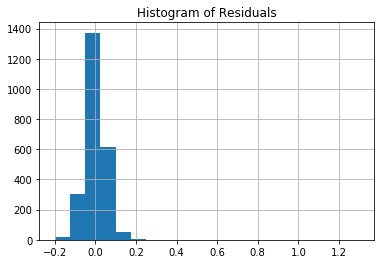

In [15]:
# For model ARIMA(1, 0, 0)
residuals = pd.DataFrame(model_100_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

For ARIMA model (0, 0, 1):

Text(0.5, 1.0, 'Histogram of Residuals')

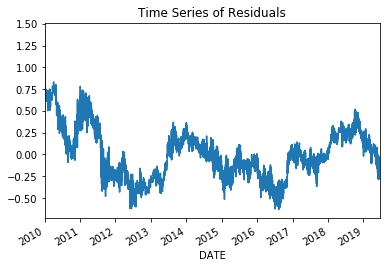

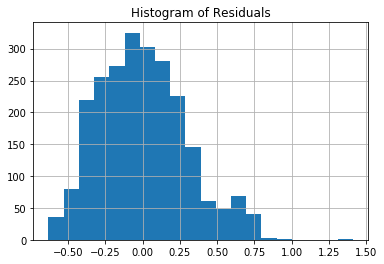

In [16]:
# For model ARIMA(0, 0, 1)
residuals = pd.DataFrame(model_001_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

For ARIMA model (2, 0, 1):

Text(0.5, 1.0, 'Histogram of Residuals')

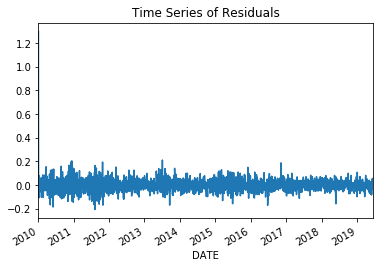

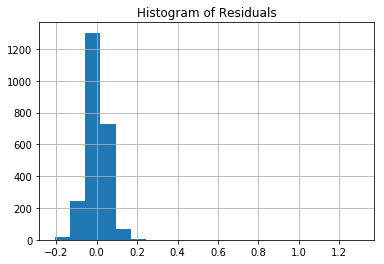

In [17]:
# For model ARIMA(2, 0, 1)
residuals = pd.DataFrame(model_201_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

For ARIMA model (5, 0, 0):

Text(0.5, 1.0, 'Histogram of Residuals')

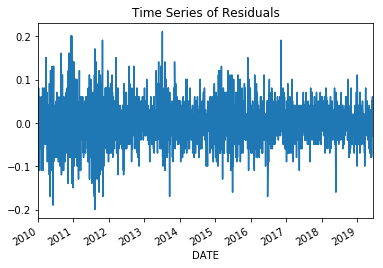

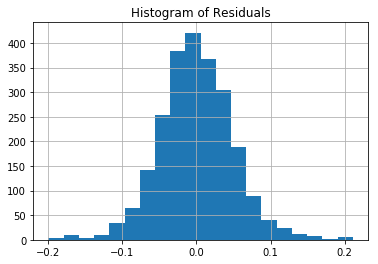

In [18]:
# For model ARIMA(5, 0, 0)
residuals = pd.DataFrame(model_010_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

**Evaluation:**  All of these models are similar except ARIMA(0, 0, 1) where the residuals time series is fairly volatile and not stable.

### Choosing one specification and making the case for that as a logical model for your dataset...  

Typically, the model with the lowest AIC.  Akaike Information Criteria, or AIC, is a measure of the degree of information contained in the model.  The AIC's for the 5 models above are as follows:  
- ARIMA(0, 1, 0):  -7573  
- ARIMA(1, 0, 0):  -7571  
- ARIMA(0, 0, 1):  931  
- ARIMA(2, 0, 1):  -7570  
- ARIMA(5, 0, 0):  -7566  

The log likelihood for the models are:  
- ARIMA(0, 1, 0):  3788
- ARIMA(1, 0, 0):  3788
- ARIMA(0, 0, 1):  -463  
- ARIMA(2, 0, 1):  3790
- ARIMA(5, 0, 0):  3790  

The lowest **AIC** number corresponds to ARIMA(0, 1, 0) which suggests that this might be the best model.  A lower the AIC number means that the model has loss less information compared to models with a higher AIC score.

The **log likelihood** for ARIMA model (0, 0, 1) is much closer to zero than the others which means there is a higher probablity we are to have predicted our outcome with this model compared to the other models.  

Since the residuals of model 0, 0, 1 are not stationary, this model can be discarded, so the best model is ARIMA(0, 1, 0) which has the lowest AIC and the tied for closes value to zero for the log likelihood. 